In [1]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

2023-10-04 22:33:51.148604: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Reading the input file 'diabetes.csv'
df = pd.read_csv('diabetes.csv')

#Check the number of records and number of columns in the input data file
print('The total number of rows/records are: ', df.shape[0])
print('The total number of columns/attributes are: ', df.shape[1])

#Print the first few records in the dataframe
df.head()

The total number of rows/records are:  788
The total number of columns/attributes are:  9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


### Question 1: Outliers removal and transformation

In [3]:
#Q1 (a)
insulin_kurtosis = df['Insulin'].kurtosis()
insulin_skewness = df['Insulin'].skew()

print(f"Kurtosis of 'Insulin': {insulin_kurtosis}")
print(f"Skewness of 'Insulin': {insulin_skewness}")

Kurtosis of 'Insulin': 7.265911343503076
Skewness of 'Insulin': 2.268393486537506


In [4]:
#Q1 (b)
# Filter the DataFrame to select rows where 'Insulin' is not equal to 0
filtered_df = df[df['Insulin'] != 0]

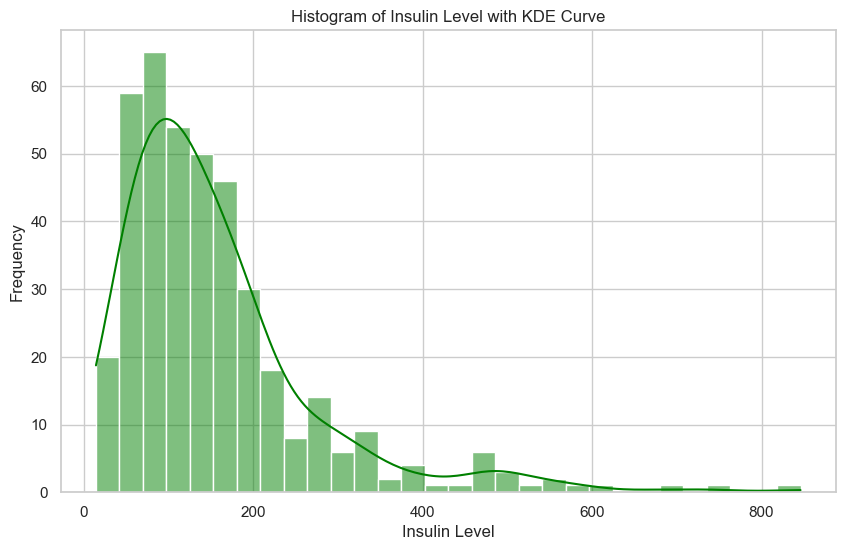

In [5]:
#Q1 (c)
sns.set(style = 'whitegrid')

#create a histogram with KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Insulin'], kde = True, color = 'green', bins = 30)

#Add labels to the axis
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')

#Set the title
plt.title('Histogram of Insulin Level with KDE Curve')

#Show the plot
plt.show()

/var/folders/md/sj91m3411jdf_dq79czbxmqc0000gn/T/ipykernel_18852/3848392577.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Insulin'] = np.where(filtered_df['Insulin'] < lower_bound, lower_bound, filtered_df['Insulin'])
/var/folders/md/sj91m3411jdf_dq79czbxmqc0000gn/T/ipykernel_18852/3848392577.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Insulin'] = np.where(filtered_df['Insulin'] > upper_bound, upper_bound, filtered_df['Insulin'])


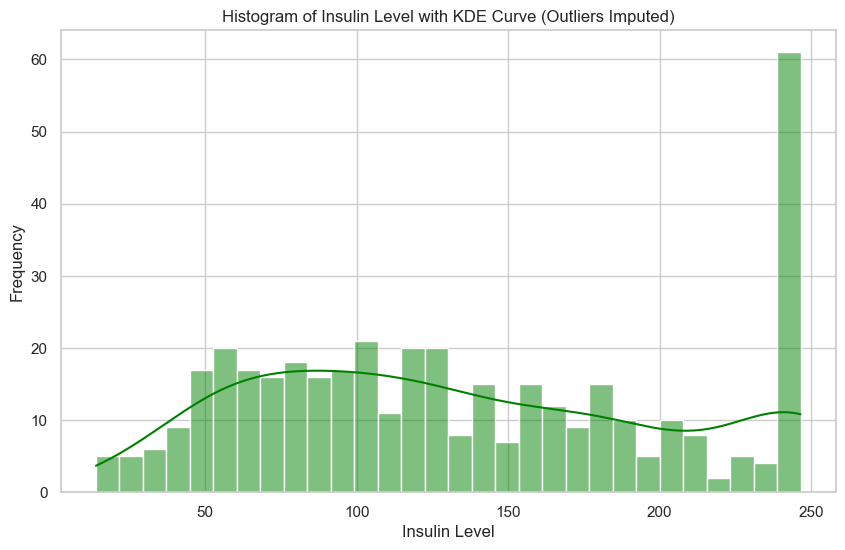

In [6]:
#Q1 (d)

#calculate the IQR
Q1 = filtered_df['Insulin'].quantile(.25)
Q3 = filtered_df['Insulin'].quantile(.75)
IQR = Q3 - Q1

#Determine lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

#Impute the outliers with lower and upper bound values
filtered_df['Insulin'] = np.where(filtered_df['Insulin'] < lower_bound, lower_bound, filtered_df['Insulin'])
filtered_df['Insulin'] = np.where(filtered_df['Insulin'] > upper_bound, upper_bound, filtered_df['Insulin'])

#set the style for the plot
sns.set(style = 'whitegrid')

#create a histogram 
plt.figure(figsize = (10, 6))
sns.histplot(filtered_df['Insulin'], kde = True, color = 'green', bins = 30)

#add labels to the axes
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')

#set the title
plt.title("Histogram of Insulin Level with KDE Curve (Outliers Imputed)")

#show the plot
plt.show()

In [7]:
#Q1 (e)

#Apply the lof transformation to the Insulin Column
filtered_df['Insulin'] = np.log1p(filtered_df['Insulin'])

/var/folders/md/sj91m3411jdf_dq79czbxmqc0000gn/T/ipykernel_18852/2885048809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Insulin'] = np.log1p(filtered_df['Insulin'])


In [8]:
#Q1 (f)
insulin_kurtosis = filtered_df['Insulin'].kurtosis()
insulin_skewness = filtered_df['Insulin'].skew()

print(f"Kurtosis of 'Insulin' after the Transformation: {insulin_kurtosis}")
print(f"Skewness of 'Insulin' after the Transformation: {insulin_skewness}")

Kurtosis of 'Insulin' after the Transformation: 0.26160866053240595
Skewness of 'Insulin' after the Transformation: -0.729826654577119


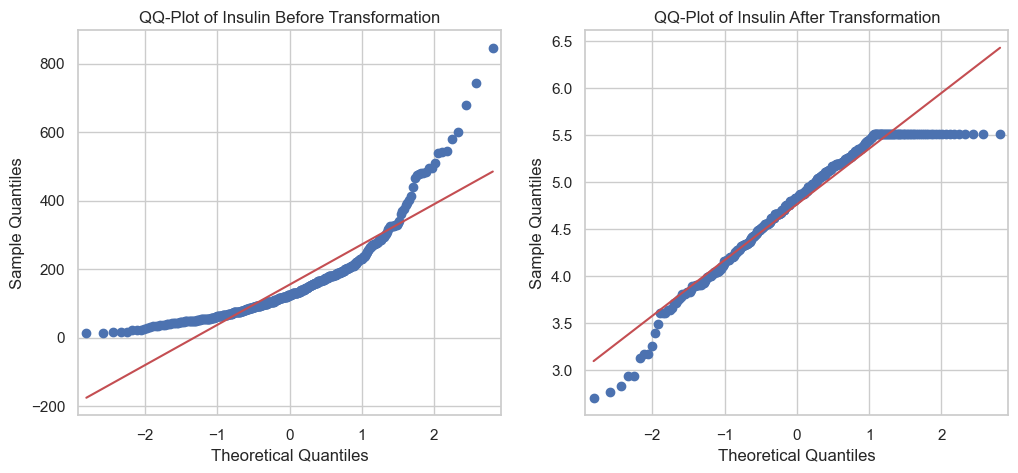

In [9]:
# Q1 (g)

# Create subplots for the QQ-plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Filter data for values of 'Insulin' not equal to 0
insulin_values_before = df[df['Insulin'] != 0]['Insulin']
insulin_values_after = filtered_df['Insulin']

# QQ-Plot Before Transformation
sm.qqplot(insulin_values_before, line='s', ax=axes[0])
axes[0].set_title("QQ-Plot of Insulin Before Transformation")
axes[0].grid(True)

# QQ-Plot After Transformation
sm.qqplot(insulin_values_after, line='s', ax=axes[1])
axes[1].set_title("QQ-Plot of Insulin After Transformation")
axes[1].grid(True)

# Show the QQ-plots
plt.show()


/var/folders/md/sj91m3411jdf_dq79czbxmqc0000gn/T/ipykernel_18852/1088829236.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Glucose'] = detect_correct_outliers(filtered_df['Glucose'])
/var/folders/md/sj91m3411jdf_dq79czbxmqc0000gn/T/ipykernel_18852/1088829236.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['BloodPressure'] = detect_correct_outliers(filtered_df['BloodPressure'])
/var/folders/md/sj91m3411jdf_dq79czbxmqc0000gn/T/ipykernel_18852/1088829236.py:21: SettingWithCo

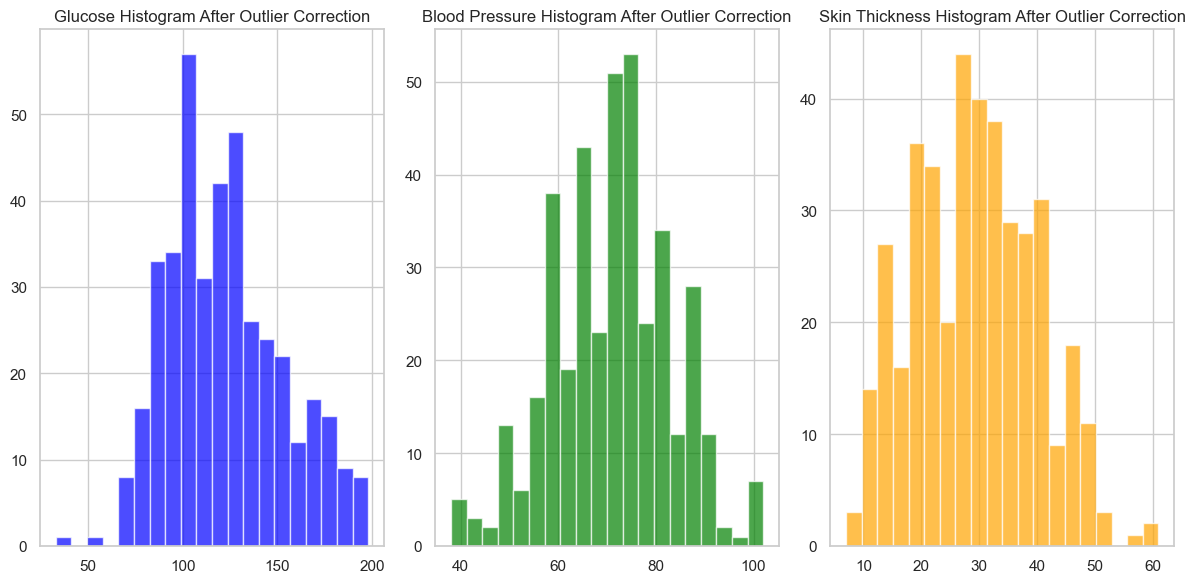

In [10]:
#Q1 (h)

# Define a function to detect and correct outliers using IQR
def detect_correct_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR
    
    # Correct outliers by imputing them with lower or upper band values
    column = np.where(column < lower_band, lower_band, column)
    column = np.where(column > upper_band, upper_band, column)
    
    return column

# Apply the outlier detection and correction to each column
filtered_df['Glucose'] = detect_correct_outliers(filtered_df['Glucose'])
filtered_df['BloodPressure'] = detect_correct_outliers(filtered_df['BloodPressure'])
filtered_df['SkinThickness'] = detect_correct_outliers(filtered_df['SkinThickness'])

# Create histograms for each column
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(filtered_df['Glucose'], bins=20, color='blue', alpha=0.7)
plt.title("Glucose Histogram After Outlier Correction")

plt.subplot(1, 3, 2)
plt.hist(filtered_df['BloodPressure'], bins=20, color='green', alpha=0.7)
plt.title("Blood Pressure Histogram After Outlier Correction")

plt.subplot(1, 3, 3)
plt.hist(filtered_df['SkinThickness'], bins=20, color='orange', alpha=0.7)
plt.title("Skin Thickness Histogram After Outlier Correction")

plt.tight_layout()
plt.show()


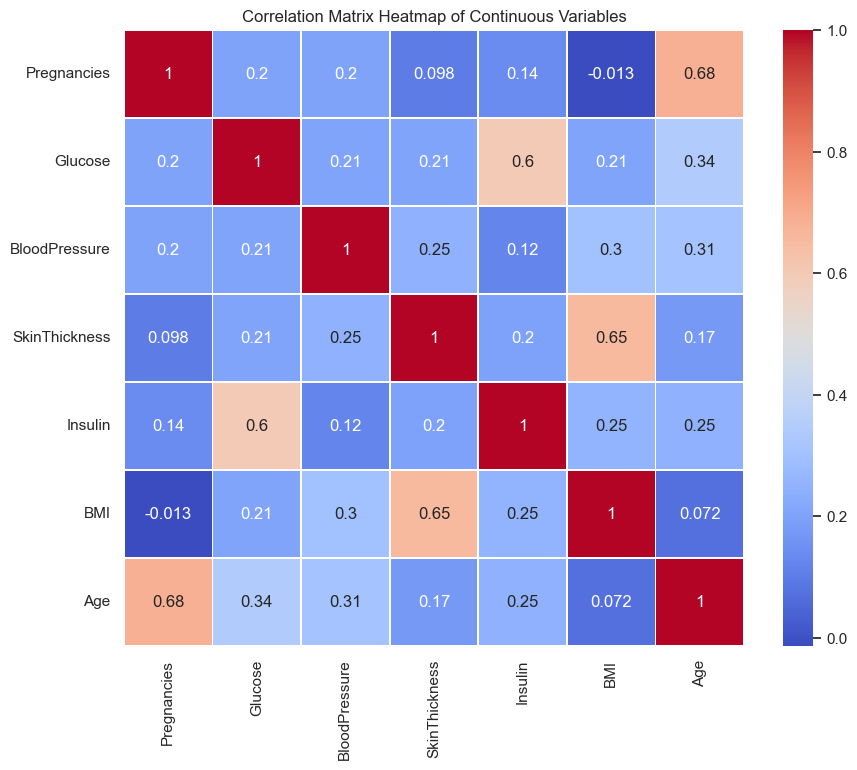

In [11]:
#Q1 (i)

# Select the continuous variables for the correlation matrix
continuous_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Calculate the correlation matrix
correlation_matrix = filtered_df[continuous_vars].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap of Continuous Variables")
plt.show()


### Question 2: Data processing

In [12]:
#Q2 (a)
# Group the patients by the number of pregnancies and calculate the average BloodPressure
pregnancy_bp_avg = filtered_df.groupby('Pregnancies')['BloodPressure'].mean().reset_index()

#renaming the columns
pregnancy_bp_avg.columns = ['Number of Pregnancies', 'Average BloodPressure']

#display the results
print(pregnancy_bp_avg)

    Number of Pregnancies  Average BloodPressure
0                       0              73.263158
1                       1              68.468085
2                       2              66.107692
3                       3              70.177778
4                       4              70.458333
5                       5              73.300000
6                       6              67.052632
7                       7              72.476190
8                       8              78.285714
9                       9              80.666667
10                     10              81.600000
11                     11              81.600000
12                     12              74.400000
13                     13              86.666667
14                     14              78.000000
15                     15              70.000000
16                     17              72.000000


In [13]:
#Q2 (b)

#Group the patients by the number of pregnancies and calculate the required statistics
pregnancy_age_stats = filtered_df.groupby('Pregnancies')['Age'].agg(['mean', 'sum', 'count']).reset_index()

#renaming the columns
pregnancy_age_stats.columns = ['Number of Pregnancies', 'Average Age', 'Total Age', 'Patient Count']

#display the results
print(pregnancy_age_stats)

    Number of Pregnancies  Average Age  Total Age  Patient Count
0                       0    24.258621       1407             58
1                       1    27.122449       2658             98
2                       2    25.194030       1688             67
3                       3    28.244444       1271             45
4                       4    30.407407        821             27
5                       5    34.666667        728             21
6                       6    38.368421        729             19
7                       7    42.761905        898             21
8                       8    44.714286        626             14
9                       9    46.583333        559             12
10                     10    48.000000        288              6
11                     11    48.400000        242              5
12                     12    46.800000        234              5
13                     13    46.333333        139              3
14                     14

In [14]:
#Q2 (c)

#Add a new columm 'BMI/Age' with the value of BMI over Age
filtered_df['BMI/Age'] = filtered_df['BMI']/filtered_df['Age']

#display the results
print(filtered_df)


     Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
3              1     89.0           66.0           23.0  4.553877  28.1   
4              0    137.0           40.0           35.0  5.129899  43.1   
6              3     78.0           50.0           32.0  4.488636  31.0   
8              2    197.0           70.0           45.0  5.511411  30.5   
13             1    189.0           60.0           23.0  5.511411  30.1   
..           ...      ...            ...            ...       ...   ...   
778            2    129.0           74.0           26.0  5.327876  33.2   
781            1    140.0           74.0           26.0  5.198497  24.1   
782            1    144.0           82.0           46.0  5.198497  46.1   
785            2    121.0           70.0           32.0  4.564348  39.1   
786            7    129.0           68.0           49.0  4.836282  38.5   

     DiabetesPedigreeFunction  Age  Outcome   BMI/Age  
3                       0.167   21        0

/var/folders/md/sj91m3411jdf_dq79czbxmqc0000gn/T/ipykernel_18852/242590798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['BMI/Age'] = filtered_df['BMI']/filtered_df['Age']


In [15]:
#Q2 (d)

#defining the conditions and corresponding labels
conditions = [
    (filtered_df['BMI'] > 45) & (filtered_df['BloodPressure'] > 100),
    (filtered_df['BMI'] > 30) & (filtered_df['BMI'] < 45) & (filtered_df['BloodPressure'] < 100),
    (filtered_df['BMI'] < 30)
]

labels = ['High', 'Medium', 'Low']

#use np.select to create the 'risk' coloumn based on conditions and labels
filtered_df['risk'] = np.select(conditions, labels, default = 'Unknown')

#display the results
print(filtered_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
3              1     89.0           66.0           23.0  4.553877  28.1   
4              0    137.0           40.0           35.0  5.129899  43.1   
6              3     78.0           50.0           32.0  4.488636  31.0   
8              2    197.0           70.0           45.0  5.511411  30.5   
13             1    189.0           60.0           23.0  5.511411  30.1   
..           ...      ...            ...            ...       ...   ...   
778            2    129.0           74.0           26.0  5.327876  33.2   
781            1    140.0           74.0           26.0  5.198497  24.1   
782            1    144.0           82.0           46.0  5.198497  46.1   
785            2    121.0           70.0           32.0  4.564348  39.1   
786            7    129.0           68.0           49.0  4.836282  38.5   

     DiabetesPedigreeFunction  Age  Outcome   BMI/Age     risk  
3                       0.167   21

/var/folders/md/sj91m3411jdf_dq79czbxmqc0000gn/T/ipykernel_18852/1215172928.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['risk'] = np.select(conditions, labels, default = 'Unknown')


In [16]:
#Q2 (e)

#read the ages.csv into a df
ages_df = pd.read_csv('ages.csv')

#merge the dfs based on the Age column
merged_df = filtered_df.merge(ages_df, on = 'Age', how = 'left')

#display the results
merged_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,risk,AgeGroup
0,1,89.0,66.0,23.0,4.553877,28.1,0.167,21,0,1.338095,Low,Adult
1,0,137.0,40.0,35.0,5.129899,43.1,2.288,15,1,2.873333,Medium,Adolescent
2,3,78.0,50.0,32.0,4.488636,31.0,0.248,26,1,1.192308,Medium,Adult
3,2,197.0,70.0,45.0,5.511411,30.5,0.158,53,1,0.575472,Medium,Adult
4,1,189.0,60.0,23.0,5.511411,30.1,0.398,59,1,0.510169,Medium,Adult


In [17]:
#Q2 (f)

#perform one-hot encoding on the AgeGroup column
one_hot = pd.get_dummies(merged_df['AgeGroup'], prefix = 'AgeGroup')

#Concatenate the one-hot encoded columns with the original DataFrame
merged_df = pd.concat([merged_df, one_hot], axis = 1)

#Drop the original 'AgeGroup' column
merged_df.drop('AgeGroup', axis = 1, inplace = True)

#display the result
print(merged_df)


     Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0              1     89.0           66.0           23.0  4.553877  28.1   
1              0    137.0           40.0           35.0  5.129899  43.1   
2              3     78.0           50.0           32.0  4.488636  31.0   
3              2    197.0           70.0           45.0  5.511411  30.5   
4              1    189.0           60.0           23.0  5.511411  30.1   
..           ...      ...            ...            ...       ...   ...   
399            2    129.0           74.0           26.0  5.327876  33.2   
400            1    140.0           74.0           26.0  5.198497  24.1   
401            1    144.0           82.0           46.0  5.198497  46.1   
402            2    121.0           70.0           32.0  4.564348  39.1   
403            7    129.0           68.0           49.0  4.836282  38.5   

     DiabetesPedigreeFunction  Age  Outcome   BMI/Age     risk  \
0                       0.167   2